In [1]:
%matplotlib inline
#import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns
#import sklearn

In [2]:
import xgboost as xgb

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_data = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_target = pd.Series(iris.target)
#iris_target = pd.DataFrame(iris.target, columns=['Name'])

In [4]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(iris_data, iris_target, test_size=0.2, shuffle=True)
#train_x, test_x, train_y, test_y = train_test_split(iris_data, iris_target, test_size=0.2, train_size=0.8, shuffle=True)

In [5]:
dtrain = xgb.DMatrix(train_x, label=train_y)
#dtest = xgb.DMatrix(test_x, label=test_y)

In [6]:
param = {'max_depth': 2, 'eta': 0.5, 'objective': 'multi:softmax', 'num_class': 3}
#param['nthread'] = 4
#param['eval_metric'] = 'mlogloss'
#evallist = [(dtest, 'eval'), (dtrain, 'train')]

In [7]:
num_round = 10
#bst = xgb.train(param, dtrain, num_round, evallist)
bst = xgb.train(param, dtrain, num_round)

In [8]:
dtest = xgb.DMatrix(test_x)
pred = bst.predict(dtest)

In [9]:
from sklearn.metrics import accuracy_score

score = accuracy_score(test_y, pred)
print('score:{0:.4f}'.format(score))

score:1.0000


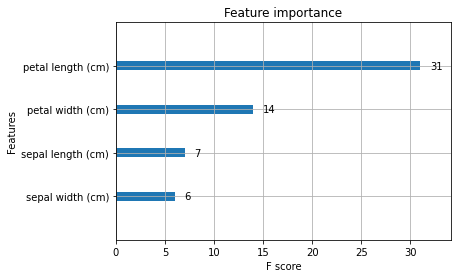

In [10]:
import matplotlib.pyplot as plt

xgb.plot_importance(bst)

In [11]:
train_x, valid_x, train_y, valid_y = train_test_split(train_x, train_y, test_size=0.2, shuffle=True)

In [12]:
dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(valid_x, label=valid_y)

In [13]:
param = {'max_depth': 2, 'eta': 0.5, 'objective': 'multi:softmax', 'num_class': 3, 'eval_metric': 'mlogloss'}
evallist = [(dvalid, 'eval'), (dtrain, 'train')]

In [14]:
num_round = 10000
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=5)

[0]	eval-mlogloss:0.56493	train-mlogloss:0.58625
Multiple eval metrics have been passed: 'train-mlogloss' will be used for early stopping.

Will train until train-mlogloss hasn't improved in 5 rounds.
[1]	eval-mlogloss:0.36077	train-mlogloss:0.36634
[2]	eval-mlogloss:0.25251	train-mlogloss:0.25071
[3]	eval-mlogloss:0.20211	train-mlogloss:0.17779
[4]	eval-mlogloss:0.16159	train-mlogloss:0.13242
[5]	eval-mlogloss:0.16041	train-mlogloss:0.10356
[6]	eval-mlogloss:0.16118	train-mlogloss:0.08582
[7]	eval-mlogloss:0.13597	train-mlogloss:0.07063
[8]	eval-mlogloss:0.13945	train-mlogloss:0.06037
[9]	eval-mlogloss:0.14494	train-mlogloss:0.05268
[10]	eval-mlogloss:0.15470	train-mlogloss:0.04702
[11]	eval-mlogloss:0.16180	train-mlogloss:0.04240
[12]	eval-mlogloss:0.16987	train-mlogloss:0.03987
[13]	eval-mlogloss:0.17359	train-mlogloss:0.03714
[14]	eval-mlogloss:0.17456	train-mlogloss:0.03532
[15]	eval-mlogloss:0.17959	train-mlogloss:0.03294
[16]	eval-mlogloss:0.18049	train-mlogloss:0.03151
[17]	eva

[160]	eval-mlogloss:0.21966	train-mlogloss:0.01550
[161]	eval-mlogloss:0.21957	train-mlogloss:0.01549
[162]	eval-mlogloss:0.21967	train-mlogloss:0.01548
[163]	eval-mlogloss:0.21959	train-mlogloss:0.01547
[164]	eval-mlogloss:0.21887	train-mlogloss:0.01546
[165]	eval-mlogloss:0.21897	train-mlogloss:0.01545
[166]	eval-mlogloss:0.21889	train-mlogloss:0.01545
[167]	eval-mlogloss:0.21898	train-mlogloss:0.01544
[168]	eval-mlogloss:0.21890	train-mlogloss:0.01543
[169]	eval-mlogloss:0.21825	train-mlogloss:0.01542
[170]	eval-mlogloss:0.21818	train-mlogloss:0.01542
[171]	eval-mlogloss:0.21828	train-mlogloss:0.01541
[172]	eval-mlogloss:0.21821	train-mlogloss:0.01540
[173]	eval-mlogloss:0.21831	train-mlogloss:0.01539
[174]	eval-mlogloss:0.21824	train-mlogloss:0.01538
[175]	eval-mlogloss:0.21833	train-mlogloss:0.01538
[176]	eval-mlogloss:0.21767	train-mlogloss:0.01537
[177]	eval-mlogloss:0.21760	train-mlogloss:0.01536
[178]	eval-mlogloss:0.21769	train-mlogloss:0.01536
[179]	eval-mlogloss:0.21762	tra

[321]	eval-mlogloss:0.21753	train-mlogloss:0.01466
[322]	eval-mlogloss:0.21714	train-mlogloss:0.01466
[323]	eval-mlogloss:0.21723	train-mlogloss:0.01465
[324]	eval-mlogloss:0.21735	train-mlogloss:0.01465
[325]	eval-mlogloss:0.21748	train-mlogloss:0.01465
[326]	eval-mlogloss:0.21760	train-mlogloss:0.01465
[327]	eval-mlogloss:0.21769	train-mlogloss:0.01464
[328]	eval-mlogloss:0.21781	train-mlogloss:0.01464
[329]	eval-mlogloss:0.21790	train-mlogloss:0.01464
[330]	eval-mlogloss:0.21801	train-mlogloss:0.01463
[331]	eval-mlogloss:0.21810	train-mlogloss:0.01463
[332]	eval-mlogloss:0.21822	train-mlogloss:0.01463
[333]	eval-mlogloss:0.21831	train-mlogloss:0.01463
[334]	eval-mlogloss:0.21842	train-mlogloss:0.01462
[335]	eval-mlogloss:0.21851	train-mlogloss:0.01462
[336]	eval-mlogloss:0.21862	train-mlogloss:0.01462
[337]	eval-mlogloss:0.21871	train-mlogloss:0.01462
[338]	eval-mlogloss:0.21882	train-mlogloss:0.01461
[339]	eval-mlogloss:0.21890	train-mlogloss:0.01461
[340]	eval-mlogloss:0.21855	tra

[482]	eval-mlogloss:0.22609	train-mlogloss:0.01442
[483]	eval-mlogloss:0.22603	train-mlogloss:0.01442
[484]	eval-mlogloss:0.22618	train-mlogloss:0.01442
[485]	eval-mlogloss:0.22627	train-mlogloss:0.01442
[486]	eval-mlogloss:0.22633	train-mlogloss:0.01442
[487]	eval-mlogloss:0.22627	train-mlogloss:0.01442
[488]	eval-mlogloss:0.22610	train-mlogloss:0.01441
[489]	eval-mlogloss:0.22616	train-mlogloss:0.01441
[490]	eval-mlogloss:0.22625	train-mlogloss:0.01441
[491]	eval-mlogloss:0.22631	train-mlogloss:0.01441
[492]	eval-mlogloss:0.22638	train-mlogloss:0.01441
[493]	eval-mlogloss:0.22644	train-mlogloss:0.01441
[494]	eval-mlogloss:0.22639	train-mlogloss:0.01441
[495]	eval-mlogloss:0.22645	train-mlogloss:0.01441
[496]	eval-mlogloss:0.22652	train-mlogloss:0.01441
[497]	eval-mlogloss:0.22667	train-mlogloss:0.01441
[498]	eval-mlogloss:0.22662	train-mlogloss:0.01441
[499]	eval-mlogloss:0.22668	train-mlogloss:0.01441
[500]	eval-mlogloss:0.22676	train-mlogloss:0.01441
[501]	eval-mlogloss:0.22659	tra

[643]	eval-mlogloss:0.22944	train-mlogloss:0.01434
[644]	eval-mlogloss:0.22932	train-mlogloss:0.01434
[645]	eval-mlogloss:0.22945	train-mlogloss:0.01434
[646]	eval-mlogloss:0.22933	train-mlogloss:0.01434
[647]	eval-mlogloss:0.22945	train-mlogloss:0.01434
[648]	eval-mlogloss:0.22933	train-mlogloss:0.01434
[649]	eval-mlogloss:0.22946	train-mlogloss:0.01434
[650]	eval-mlogloss:0.22934	train-mlogloss:0.01434
[651]	eval-mlogloss:0.22946	train-mlogloss:0.01434
[652]	eval-mlogloss:0.22934	train-mlogloss:0.01434
[653]	eval-mlogloss:0.22930	train-mlogloss:0.01434
[654]	eval-mlogloss:0.22936	train-mlogloss:0.01434
[655]	eval-mlogloss:0.22941	train-mlogloss:0.01434
[656]	eval-mlogloss:0.22946	train-mlogloss:0.01434
[657]	eval-mlogloss:0.22942	train-mlogloss:0.01434
[658]	eval-mlogloss:0.22947	train-mlogloss:0.01434
[659]	eval-mlogloss:0.22953	train-mlogloss:0.01433
[660]	eval-mlogloss:0.22957	train-mlogloss:0.01433
[661]	eval-mlogloss:0.22963	train-mlogloss:0.01433
[662]	eval-mlogloss:0.22967	tra

[804]	eval-mlogloss:0.23154	train-mlogloss:0.01430
[805]	eval-mlogloss:0.23158	train-mlogloss:0.01430
[806]	eval-mlogloss:0.23163	train-mlogloss:0.01430
[807]	eval-mlogloss:0.23166	train-mlogloss:0.01430
[808]	eval-mlogloss:0.23171	train-mlogloss:0.01430
[809]	eval-mlogloss:0.23174	train-mlogloss:0.01430
[810]	eval-mlogloss:0.23171	train-mlogloss:0.01430
[811]	eval-mlogloss:0.23175	train-mlogloss:0.01430
[812]	eval-mlogloss:0.23179	train-mlogloss:0.01429
[813]	eval-mlogloss:0.23187	train-mlogloss:0.01429
[814]	eval-mlogloss:0.23184	train-mlogloss:0.01429
[815]	eval-mlogloss:0.23188	train-mlogloss:0.01429
[816]	eval-mlogloss:0.23192	train-mlogloss:0.01429
[817]	eval-mlogloss:0.23196	train-mlogloss:0.01429
[818]	eval-mlogloss:0.23200	train-mlogloss:0.01429
[819]	eval-mlogloss:0.23192	train-mlogloss:0.01429
[820]	eval-mlogloss:0.23201	train-mlogloss:0.01429
[821]	eval-mlogloss:0.23192	train-mlogloss:0.01429
[822]	eval-mlogloss:0.23202	train-mlogloss:0.01429
[823]	eval-mlogloss:0.23193	tra

In [15]:
print('Best Score:{0:.4f}, Iteratin:{1:d}, Ntree_Limit:{2:d}'.format(
     bst.best_score, bst.best_iteration, bst.best_ntree_limit))

Best Score:0.0143, Iteratin:827, Ntree_Limit:828


In [16]:
dtest = xgb.DMatrix(test_x)
pred = bst.predict(dtest, ntree_limit=bst.best_ntree_limit)

In [17]:
from sklearn.metrics import accuracy_score

score = accuracy_score(test_y, pred)
print('score:{0:.4f}'.format(score))

score:1.0000


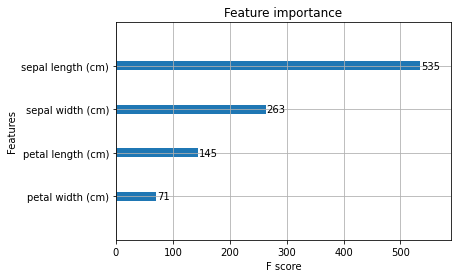

In [18]:
import matplotlib.pyplot as plt

xgb.plot_importance(bst)